# 第6章 k平均法：教師なし学習モデルの基礎

## 「06-k_means.py」の解説

ITエンジニアための機械学習理論入門「第6章 k平均法:教師なし学習モデルの基礎」で使用しているサンプルコード「06-k_means.py」の解説です。

※ 解説用にコードの内容は少し変更しています。

はじめに必要なモジュールをインポートしておきます。

特に、画像データを扱うためにPILモジュールを利用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

画像ファイル「photo.jpg」が用意されていることを確認します。

In [2]:
ls -l photo.jpg

-rw-r--r--. 1 root root 47187 Aug 10 08:54 photo.jpg


画像ファイル「photo.jpg」を読み込みます。

In [3]:
im = Image.open("photo.jpg")    

画像を表示してみます。白、赤、緑の３色を中心に構成された画像です。

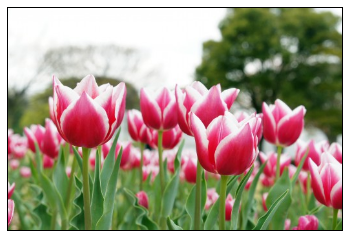

In [4]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

画像データを各ピクセルの (R,G,B) を並べたリストに変換します。

In [5]:
pixels = list(im.convert('RGB').getdata())    

リストの先頭部分を確認すると、次のようになります。

In [6]:
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (254, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

このリストから、k平均法で「代表色」を決定する関数を用意します。

k個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [7]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print "Initial centers:",
    print map(lambda x: x.tolist(), center)
    print "========================"
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
            if num_points[i] == 0:
                center_new[i] = np.array([0,0,0])
            else:
                center_new[i] = center_new[i] / num_points[i]
        center = center_new
        print map(lambda x: x.tolist(), center)
        print "Distortion: J=%d" % distortion_new

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
        
    # 画像データの各ピクセルを代表色で置き換え
    new_pixels = []
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))

    print "Done."
    return new_pixels

例として、2つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 2)

Initial centers: [[116, 199, 161], [219, 124, 34]]
[[189, 193, 176], [119, 77, 56]]
Distortion: J=3365337604
[[226, 209, 211], [107, 92, 57]]
Distortion: J=1235952688
[[233, 215, 220], [110, 95, 62]]
Distortion: J=913305378
[[234, 218, 222], [112, 96, 63]]
Distortion: J=889691719
[[234, 219, 223], [112, 96, 64]]
Distortion: J=886724122
[[234, 219, 223], [112, 96, 64]]
Distortion: J=886260562
Done.


結果を画像として表示します。

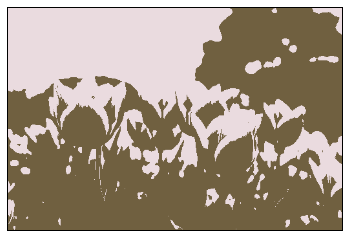

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

同様に3つのクラスターに分類します。

In [10]:
result = run_kmeans(pixels, 3)

Initial centers: [[108, 199, 34], [38, 145, 254], [109, 114, 0]]
[[154, 151, 122], [241, 235, 237], [109, 81, 54]]
Distortion: J=4342761940
[[166, 136, 122], [240, 232, 235], [98, 83, 48]]
Distortion: J=653380057
[[172, 127, 120], [240, 232, 235], [92, 86, 46]]
Distortion: J=609973375
[[175, 121, 117], [240, 232, 234], [88, 89, 46]]
Distortion: J=595507788
[[176, 115, 114], [239, 232, 234], [86, 92, 46]]
Distortion: J=588283075
[[177, 111, 111], [239, 231, 233], [84, 94, 47]]
Distortion: J=583367376
[[178, 107, 109], [239, 231, 233], [82, 96, 47]]
Distortion: J=580206124
[[178, 104, 107], [238, 230, 233], [81, 97, 48]]
Distortion: J=577888410
[[179, 101, 106], [238, 230, 232], [81, 99, 48]]
Distortion: J=576671422
[[179, 99, 105], [238, 230, 232], [81, 100, 49]]
Distortion: J=575513634
[[180, 97, 104], [238, 229, 232], [81, 101, 49]]
Distortion: J=574844671
[[180, 95, 103], [238, 229, 232], [81, 102, 50]]
Distortion: J=574334634
Done.


結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

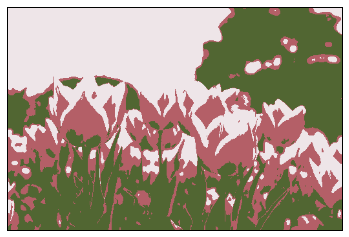

In [11]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

最後に、8つのクラスターに分類して、結果を画像として表示してみます。

In [12]:
result = run_kmeans(pixels, 8)

Initial centers: [[231, 215, 136], [119, 120, 210], [73, 94, 39], [94, 104, 66], [36, 42, 156], [177, 96, 253], [185, 215, 174], [246, 105, 104]]
[[224, 161, 167], [138, 148, 136], [61, 76, 30], [114, 119, 72], [0, 0, 0], [223, 127, 190], [231, 225, 224], [208, 72, 107]]
Distortion: J=935810067
[[212, 170, 177], [144, 157, 121], [61, 75, 31], [104, 126, 68], [16, 39, 11], [228, 120, 165], [242, 238, 239], [195, 47, 81]]
Distortion: J=312371667
[[211, 182, 188], [142, 154, 115], [60, 81, 33], [100, 126, 66], [26, 51, 16], [222, 111, 150], [244, 242, 243], [185, 36, 66]]
Distortion: J=189557880
[[213, 187, 192], [140, 152, 112], [61, 86, 35], [99, 125, 65], [30, 56, 18], [219, 105, 142], [246, 244, 245], [180, 31, 59]]
Distortion: J=155777619
[[214, 188, 194], [138, 152, 110], [63, 89, 37], [99, 125, 65], [32, 58, 19], [217, 101, 138], [246, 245, 245], [178, 29, 56]]
Distortion: J=146963613
[[215, 189, 195], [137, 152, 109], [65, 92, 38], [99, 125, 65], [34, 59, 20], [216, 98, 135], [247

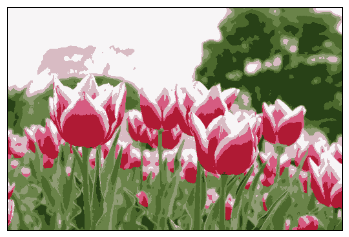

In [13]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

インターネットから好きな画像をダウンロードして試すこともできます。ここでは、無償利用可能なフリー素材をダウンロードしてみます。

In [14]:
!curl -OL http://2.bp.blogspot.com/-4SSFZUa0ab4/Vg57ivCMfhI/AAAAAAAAyzQ/Pm4eBFxAaOc/s800/sweets_fruit_pafe.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  308k  100  308k    0     0  17.8M      0 --:--:-- --:--:-- --:--:-- 18.8M


ダウンロードしたファイルを確認します。

In [15]:
!ls *.png

sweets_fruit_pafe.png


ファイルを読み込んで表示します。

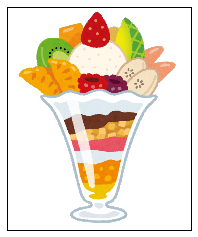

In [16]:
im = Image.open("sweets_fruit_pafe.png")
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

RBG形式のデータに変換して、5つのクラスターに分類します。背景の透明色部分は、黒色に変換される点に注意してください。

In [17]:
pixels = list(im.convert('RGB').getdata())
result = run_kmeans(pixels, 5)

Initial centers: [[31, 34, 207], [15, 193, 180], [217, 184, 167], [52, 157, 148], [199, 59, 122]]
[[0, 0, 0], [0, 229, 209], [231, 219, 184], [102, 173, 43], [202, 91, 31]]
Distortion: J=16750968409
[[0, 0, 0], [9, 112, 255], [232, 225, 212], [131, 183, 44], [211, 110, 29]]
Distortion: J=1178668387
[[1, 0, 0], [44, 117, 255], [232, 229, 221], [146, 189, 45], [217, 114, 37]]
Distortion: J=969461348
[[1, 0, 0], [51, 121, 251], [232, 230, 223], [147, 189, 45], [220, 117, 38]]
Distortion: J=936071817
[[2, 0, 0], [63, 130, 242], [232, 230, 223], [147, 189, 46], [222, 118, 38]]
Distortion: J=932323727
[[2, 1, 0], [112, 143, 206], [232, 230, 224], [147, 189, 46], [224, 120, 38]]
Distortion: J=930666048
[[2, 1, 0], [167, 184, 198], [236, 233, 225], [147, 189, 45], [225, 121, 38]]
Distortion: J=919508422
[[2, 1, 0], [180, 187, 191], [243, 240, 231], [146, 190, 44], [225, 121, 38]]
Distortion: J=819107413
[[2, 1, 0], [191, 190, 182], [243, 241, 234], [146, 190, 44], [225, 120, 37]]
Distortion: J

結果を表示して確認します。

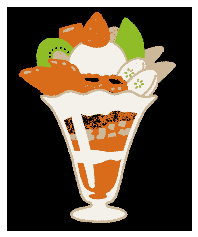

In [18]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)